<a href="https://colab.research.google.com/github/vsvale/AUTOML/blob/main/auto_sklearn_wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install --upgrade dask
!sudo apt-get install build-essential swig 
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install 
!pip install auto-sklearn

# RESTART RUNTIME!


In [1]:
import sklearn.model_selection
import sklearn.metrics
import autosklearn.classification

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [2]:
!git clone https://github.com/vsvale/Building-Machine-Learning-Models-in-Spark-2.git

Cloning into 'Building-Machine-Learning-Models-in-Spark-2'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./Building-Machine-Learning-Models-in-Spark-2/datasets/wine.data',header=None)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [7]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

In [8]:
automl = AutoSklearn2Classifier()

In [11]:
%%capture
automl.fit(X_train, y_train)

In [12]:
y_pred = automl.predict(X_test)

In [13]:
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy score 1.0


In [14]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 68df2f06-a6ec-11eb-82c3-0242ac1c0002
  Metric: accuracy
  Best validation score: 1.000000
  Number of target algorithm runs: 610
  Number of successful target algorithm runs: 609
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



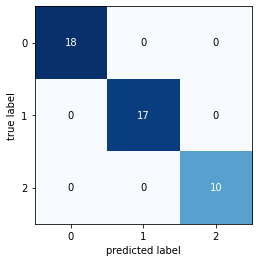

In [15]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()